## Exploratory Data Analysis

In [1]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# statsmodels library
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# sklearn library
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# displays floats with 2 decimal points
pd.options.display.float_format = '{:.2f}'.format

In [2]:
# load in dataset
df = pd.read_csv('./cleaned_kchd_V3.csv', index_col=0, parse_dates=['date'])

In [3]:
dff = pd.read_csv('./data/kc_house_data.csv')

In [4]:
dff.price.mean()

1108535.837871

In [5]:
df.price.mean()

1108535.837871

### First look at the data

In [6]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,logged_price
0,7399300360,2022-05-24,675000.00,4,1.00,1180,7140,1.00,0,NO,...,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.46,-122.19,13.42
1,8910500230,2021-12-13,920000.00,5,2.50,2770,6703,1.00,0,NO,...,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.71,-122.36,13.73
2,1180000275,2021-09-29,311000.00,6,2.00,2880,6156,1.00,0,NO,...,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.50,-122.23,12.65
3,1604601802,2021-12-14,775000.00,3,3.00,2160,1400,2.00,0,NO,...,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.57,-122.29,13.56
4,8562780790,2021-08-24,592500.00,2,2.00,1120,758,2.00,0,NO,...,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.53,-122.07,13.29


In [7]:
df.iloc[:,:13].head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,view,condition
0,7399300360,2022-05-24,675000.00,4,1.00,1180,7140,1.00,0,NO,NO,NONE,Good
1,8910500230,2021-12-13,920000.00,5,2.50,2770,6703,1.00,0,NO,YES,AVERAGE,Average
2,1180000275,2021-09-29,311000.00,6,2.00,2880,6156,1.00,0,NO,NO,AVERAGE,Average
3,1604601802,2021-12-14,775000.00,3,3.00,2160,1400,2.00,0,NO,NO,AVERAGE,Average
4,8562780790,2021-08-24,592500.00,2,2.00,1120,758,2.00,0,NO,YES,NONE,Average


In [8]:
df.iloc[:,12:].head()

,condition,grade,heat_source,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,logged_price
0,Good,7 Average,Gas,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.46,-122.19,13.42
1,Average,7 Average,Oil,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.71,-122.36,13.73
2,Average,7 Average,Gas,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.50,-122.23,12.65
3,Average,9 Better,Gas,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.57,-122.29,13.56
4,Average,7 Average,Electricity,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.53,-122.07,13.29


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30155 entries, 0 to 30154
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             30155 non-null  int64         
 1   date           30155 non-null  datetime64[ns]
 2   price          30155 non-null  float64       
 3   bedrooms       30155 non-null  int64         
 4   bathrooms      30155 non-null  float64       
 5   sqft_living    30155 non-null  int64         
 6   sqft_lot       30155 non-null  int64         
 7   floors         30155 non-null  float64       
 8   waterfront     30155 non-null  int64         
 9   greenbelt      30155 non-null  object        
 10  nuisance       30155 non-null  object        
 11  view           30155 non-null  object        
 12  condition      30155 non-null  object        
 13  grade          30155 non-null  object        
 14  heat_source    30123 non-null  object        
 15  sewer_system   3014

In [10]:
df.isna().sum()

id                0
date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
greenbelt         0
nuisance          0
view              0
condition         0
grade             0
heat_source      32
sewer_system     14
sqft_above        0
sqft_basement     0
sqft_garage       0
sqft_patio        0
yr_built          0
yr_renovated      0
address           0
lat               0
long              0
logged_price      0
dtype: int64

Drop null values from heat source and sewer system

In [11]:
df.dropna(subset=['heat_source', 'sewer_system'], inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30111 entries, 0 to 30154
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             30111 non-null  int64         
 1   date           30111 non-null  datetime64[ns]
 2   price          30111 non-null  float64       
 3   bedrooms       30111 non-null  int64         
 4   bathrooms      30111 non-null  float64       
 5   sqft_living    30111 non-null  int64         
 6   sqft_lot       30111 non-null  int64         
 7   floors         30111 non-null  float64       
 8   waterfront     30111 non-null  int64         
 9   greenbelt      30111 non-null  object        
 10  nuisance       30111 non-null  object        
 11  view           30111 non-null  object        
 12  condition      30111 non-null  object        
 13  grade          30111 non-null  object        
 14  heat_source    30111 non-null  object        
 15  sewer_system   3011

waterfront, view, and yr_renovated have null values

In [13]:
df['waterfront'].value_counts()

0    29600
1      511
Name: waterfront, dtype: int64

In [14]:
df['view'].value_counts()

NONE         26555
AVERAGE       1910
GOOD           877
EXCELLENT      549
FAIR           220
Name: view, dtype: int64

In [15]:
df['yr_renovated'].value_counts()

0       28743
2021       69
2006       49
2018       44
1990       42
        ...  
1924        1
1972        1
1948        1
1942        1
1966        1
Name: yr_renovated, Length: 82, dtype: int64

It's possible a 0 value for yr_renovated means it has not been renovated. This could be useful in our model to see if a renovation has had a significant impact on the house price.

In [16]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long,logged_price
count,30111.00,30111.00,30111.00,30111.00,30111.00,30111.00,30111.00,30111.00,30111.00,30111.00,30111.00,30111.00,30111.00,30111.00,30111.00,30111.00,30111.00
mean,4539171422.40,1108970.65,3.42,2.34,2113.34,16648.80,1.54,0.02,1810.39,476.62,330.48,217.45,1975.16,90.79,47.33,-121.32,13.74
std,2882235761.32,896515.83,0.98,0.89,973.45,59933.03,0.57,0.13,877.73,579.81,285.73,245.30,32.05,416.20,1.43,5.72,0.58
min,1000055.00,27360.00,0.00,0.00,3.00,402.00,1.00,0.00,2.00,0.00,0.00,0.00,1900.00,0.00,21.27,-157.79,10.22
25%,2070850032.50,649236.00,3.00,2.00,1420.00,4850.00,1.00,0.00,1180.00,0.00,0.00,40.00,1953.00,0.00,47.41,-122.33,13.38
50%,3876000200.00,860000.00,3.00,2.50,1920.00,7477.00,1.50,0.00,1560.00,0.00,400.00,150.00,1977.00,0.00,47.55,-122.23,13.66
75%,7287100141.00,1300000.00,4.00,3.00,2620.00,10568.00,2.00,0.00,2270.00,940.00,510.00,320.00,2003.00,0.00,47.67,-122.12,14.08
max,9904000012.00,30750000.00,13.00,10.50,15360.00,3253932.00,4.00,1.00,12660.00,8020.00,3580.00,4370.00,2022.00,2022.00,64.82,-70.07,17.24


### Assigning Numbers to Categorical Columns

condition, view, and grade we can assign number values to. This will help with sorting and our regression later on. We are also going to convert yr_renovated into a YES or NO column. So if a house was renovated it will be YES if not it will say NO.

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30111 entries, 0 to 30154
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             30111 non-null  int64         
 1   date           30111 non-null  datetime64[ns]
 2   price          30111 non-null  float64       
 3   bedrooms       30111 non-null  int64         
 4   bathrooms      30111 non-null  float64       
 5   sqft_living    30111 non-null  int64         
 6   sqft_lot       30111 non-null  int64         
 7   floors         30111 non-null  float64       
 8   waterfront     30111 non-null  int64         
 9   greenbelt      30111 non-null  object        
 10  nuisance       30111 non-null  object        
 11  view           30111 non-null  object        
 12  condition      30111 non-null  object        
 13  grade          30111 non-null  object        
 14  heat_source    30111 non-null  object        
 15  sewer_system   3011

In [18]:
# taking a look at grade
df.grade.value_counts()

7 Average        11693
8 Good            9400
9 Better          3804
6 Low Average     2852
10 Very Good      1369
11 Excellent       406
5 Fair             385
12 Luxury          122
4 Low               46
13 Mansion          24
3 Poor               9
2 Substandard        1
Name: grade, dtype: int64

In [19]:
# split grade into a list and assign the first value
# to the grade_num column
df['grade_num'] = df['grade'].str.split().str[0].astype(int)

In [20]:
# take a look at grade_num column
df['grade_num']

0        7
1        7
2        7
3        9
4        7
        ..
30150    8
30151    7
30152    7
30153    8
30154    7
Name: grade_num, Length: 30111, dtype: int32

In [21]:
# check out the final input
df[['grade', 'grade_num']].head(10)

,grade,grade_num
0,7 Average,7
1,7 Average,7
2,7 Average,7
3,9 Better,9
4,7 Average,7
5,7 Average,7
6,9 Better,9
7,8 Good,8
8,8 Good,8
9,8 Good,8


Assigning a number value to grade was successful now assign value to condition.

In [22]:
# taking a look at condition
df.condition.value_counts()

Average      18515
Good          8052
Very Good     3258
Fair           225
Poor            61
Name: condition, dtype: int64

The order for condition it POOR, FAIR, AVERAGE, GOOD, VERY GOOD

In [23]:
# create a dictionary to assign numbers to the values
condition_dict = {
    "Poor": 1,
    "Fair": 2,
    "Average": 3,
    "Good": 4,
    "Very Good": 5
}

In [24]:
# take a look at condition column
df['condition']

0           Good
1        Average
2        Average
3        Average
4        Average
          ...   
30150       Good
30151    Average
30152    Average
30153    Average
30154    Average
Name: condition, Length: 30111, dtype: object

In [25]:
# create new column and assign to the map of condition using
# the dictionary we created
df['condition_num'] = df['condition'].map(condition_dict)

In [26]:
# check to see if it worked
df[['condition','condition_num']]

,condition,condition_num
0,Good,4
1,Average,3
2,Average,3
3,Average,3
4,Average,3
...,...,...
30150,Good,4
30151,Average,3
30152,Average,3
30153,Average,3


Condition column was assigned a numeric value now it is time to convert view to a numeric value

In [27]:
# taking a look at view
df.view.value_counts()

NONE         26555
AVERAGE       1910
GOOD           877
EXCELLENT      549
FAIR           220
Name: view, dtype: int64

In [28]:
# create a dictionary for the view values
view_dict = {
    "NONE": 1,
    "FAIR": 2,
    "AVERAGE": 3,
    "GOOD": 4,
    "EXCELLENT": 5
}

In [29]:
# creating a new view_num column with the values from dict
df['view_num'] = df['view'].map(view_dict)

In [30]:
# check to see if it worked
df[['view', 'view_num']].loc[df['view'] != "NONE"]

,view,view_num
1,AVERAGE,3
2,AVERAGE,3
3,AVERAGE,3
6,AVERAGE,3
9,AVERAGE,3
...,...,...
30098,FAIR,2
30114,AVERAGE,3
30120,AVERAGE,3
30145,AVERAGE,3


Now it is time to convert yr_renovated into a YES or NO column if the home was renovated after 2009

In [31]:
df['yr_renovated_yes_or_no'] = df['yr_renovated'].map(lambda x: 1 if x >= 2010 else 0)

In [32]:
df[['yr_renovated', 'yr_renovated_yes_or_no']].loc[df['yr_renovated'] != 0]

,yr_renovated,yr_renovated_yes_or_no
24,2005,0
36,1995,0
40,2008,0
42,1978,0
51,2015,1
...,...,...
30084,1993,0
30094,2016,1
30105,1988,0
30107,1967,0


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30111 entries, 0 to 30154
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      30111 non-null  int64         
 1   date                    30111 non-null  datetime64[ns]
 2   price                   30111 non-null  float64       
 3   bedrooms                30111 non-null  int64         
 4   bathrooms               30111 non-null  float64       
 5   sqft_living             30111 non-null  int64         
 6   sqft_lot                30111 non-null  int64         
 7   floors                  30111 non-null  float64       
 8   waterfront              30111 non-null  int64         
 9   greenbelt               30111 non-null  object        
 10  nuisance                30111 non-null  object        
 11  view                    30111 non-null  object        
 12  condition               30111 non-null  object

### Extracting zipcode from address

In [34]:
df['address'].iloc[4]

'2193 Northwest Talus Drive, Issaquah, Washington 98027, United States'

In [35]:
# take the 5 numbers for the zipcode
df['zipcode'] = df.address.str[-20:-15]

In [36]:
df['zipcode'].unique()

array(['98055', '98133', '98178', '98118', '98027', '98166', '98030',
       '98023', '98019', '98144', '98031', '68106', '98092', '98103',
       '98006', '98136', '98007', '98038', '98057', '98077', '98126',
       '98053', '98039', '98107', '98008', '98155', '98168', '98199',
       '98004', '98045', '98052', '98011', '98002', '98033', '98116',
       '08360', '98198', '98125', '98001', '62859', '98112', '98034',
       '98056', '98059', '98005', '98040', '98014', '98106', '98029',
       '98122', '98003', '98117', '98042', '98119', '98065', '98022',
       '98072', '98058', '98108', '98115', '98074', '98105', '98024',
       '07087', '98146', '11704', '68123', '98109', '98102', '52405',
       '02066', '80501', '91343', '19131', '98028', '98188', '55417',
       '98177', '98075', '98010', '98148', '53158', '98047', '15120',
       '98032', '97210', '98070', '11105', '91730', '68410', '58490',
       '68048', '62703', '68601', '61108', '96816', '47060', '48503',
       '55901', '117

In [37]:
df.loc[df['address'].str.contains(', Washington')]['address'].iloc[0]

'2102 Southeast 21st Court, Renton, Washington 98055, United States'

In [38]:
df.loc[df['address'].str.contains('Washington 98')]['zipcode'].value_counts()

98042    992
98038    857
98103    761
98115    760
98117    748
        ... 
98338      2
98387      1
98296      1
98422      1
98270      1
Name: zipcode, Length: 88, dtype: int64

Load in Excel file containing King County zipcodes

In [39]:
zipcodes = pd.read_excel('./data/kc_zipcodes.xlsx')
zipcodes.zipcode.astype(str)

0      98001
1      98002
2      98003
3      98004
4      98005
       ...  
115    98195
116    98198
117    98199
118    98224
119    98288
Name: zipcode, Length: 120, dtype: object

In [40]:
zipcode_list = zipcodes.zipcode.astype(str)
zipcode_list

0      98001
1      98002
2      98003
3      98004
4      98005
       ...  
115    98195
116    98198
117    98199
118    98224
119    98288
Name: zipcode, Length: 120, dtype: object

In [41]:
# filter df by king county zipcodes and save the new df
df = df.loc[df['zipcode'].isin(zipcode_list)].copy()

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29149 entries, 0 to 30154
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      29149 non-null  int64         
 1   date                    29149 non-null  datetime64[ns]
 2   price                   29149 non-null  float64       
 3   bedrooms                29149 non-null  int64         
 4   bathrooms               29149 non-null  float64       
 5   sqft_living             29149 non-null  int64         
 6   sqft_lot                29149 non-null  int64         
 7   floors                  29149 non-null  float64       
 8   waterfront              29149 non-null  int64         
 9   greenbelt               29149 non-null  object        
 10  nuisance                29149 non-null  object        
 11  view                    29149 non-null  object        
 12  condition               29149 non-null  object

In [43]:
df.shape

(29149, 31)

In [44]:
df['price'].quantile([0.05,0.90])

0.05    425000.00
0.90   1930800.00
Name: price, dtype: float64

In [45]:
df['price'].mean()

1113428.9581117705

In [46]:
df['price'].median()

869000.0

In [47]:
df = df[(df['price']>425000) & (df['price']<1930800)]

In [48]:
df.shape

(24735, 31)

## Exploratory Data Analysis

<AxesSubplot:xlabel='view', ylabel='price'>

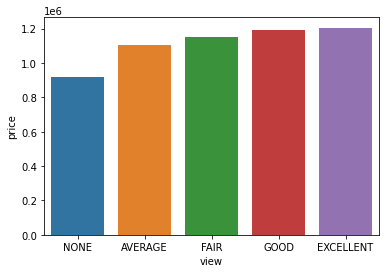

In [49]:
# Drop Null values from view column
view_price = df.dropna(subset=['view'])[['price','view']].groupby(by='view').mean().sort_values(by='price')

sns.barplot(data=view_price.reset_index(), x='view', y='price')

<AxesSubplot:xlabel='grade', ylabel='price'>

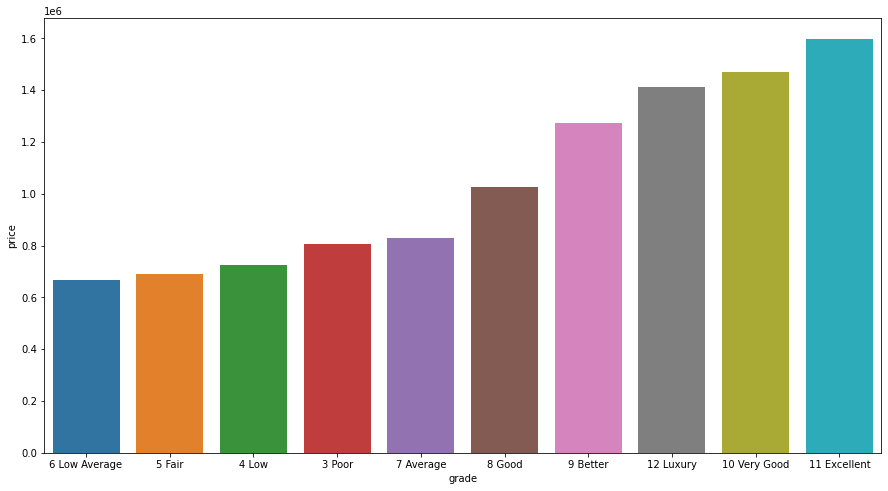

In [50]:
grade_price = df[['price','grade']].groupby(by='grade').mean().sort_values(by='price').reset_index()

fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(data=grade_price, x='grade', y='price', ax=ax)

<AxesSubplot:xlabel='condition', ylabel='price'>

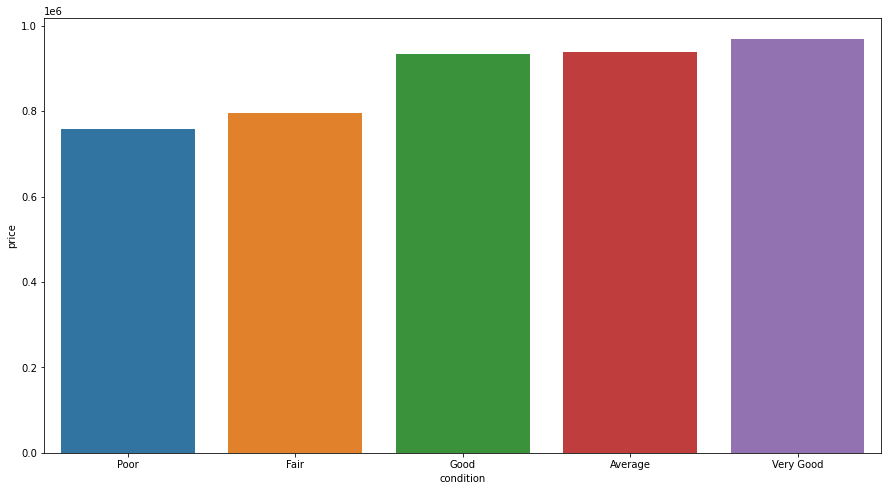

In [51]:
condition_price = df[['price','condition']].groupby(by='condition').mean().sort_values(by='price').reset_index()

fig, ax = plt.subplots(figsize=(15,8))

sns.barplot(data=condition_price, x='condition', y='price', ax=ax)

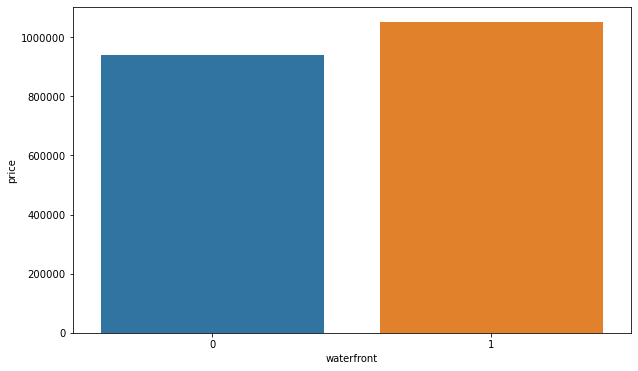

In [52]:
waterfront_price = df[['price','waterfront']].groupby(by='waterfront').mean().sort_values(by='price').reset_index()

fig, ax = plt.subplots(figsize=(10,6))

sns.barplot(data=waterfront_price, x='waterfront', y='price', ax=ax)
plt.ticklabel_format(style='plain', axis='y',useOffset=False)

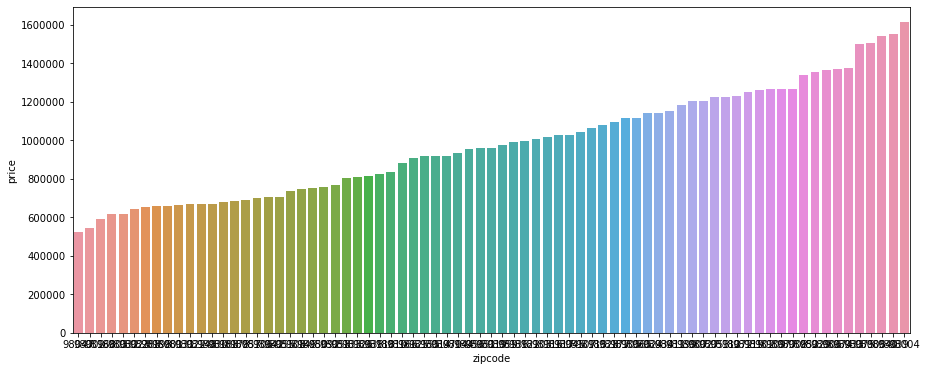

In [53]:
# top 10 zipcodes by average price
zipcode_price = df[['price','zipcode']].groupby(by='zipcode').mean().reset_index().sort_values(by='price')\


fig, ax = plt.subplots(figsize=(15,6))

sns.barplot(data=zipcode_price, x='zipcode', y='price', ax=ax)
plt.ticklabel_format(style='plain', axis='y',useOffset=False)

Now I'll look at relationships of variables with scatter plots

In [54]:
df.select_dtypes(exclude='object').drop(columns=['id', 'lat','long'])

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,logged_price,grade_num,condition_num,view_num,yr_renovated_yes_or_no
0,2022-05-24,675000.00,4,1.00,1180,7140,1.00,0,1180,0,0,40,1969,0,13.42,7,4,1,0
1,2021-12-13,920000.00,5,2.50,2770,6703,1.00,0,1570,1570,0,240,1950,0,13.73,7,3,3,0
3,2021-12-14,775000.00,3,3.00,2160,1400,2.00,0,1090,1070,200,270,2010,0,13.56,9,3,3,0
4,2021-08-24,592500.00,2,2.00,1120,758,2.00,0,1120,550,550,30,2012,0,13.29,7,3,1,0
5,2021-07-20,625000.00,2,1.00,1190,5688,1.00,0,1190,0,300,0,1948,0,13.35,7,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,2021-11-30,1555000.00,5,2.00,1910,4000,1.50,0,1600,1130,0,210,1921,0,14.26,8,4,1,0
30151,2021-06-16,1313000.00,3,2.00,2020,5800,2.00,0,2020,0,0,520,2011,0,14.09,7,3,2,0
30152,2022-05-27,800000.00,3,2.00,1620,3600,1.00,0,940,920,240,110,1995,0,13.59,7,3,1,0
30153,2022-02-24,775000.00,3,2.50,2570,2889,2.00,0,1830,740,480,100,2006,0,13.56,8,3,1,0


In [55]:
# pair plots in seaborn
# sns.pairplot(data=df.select_dtypes(exclude='object').drop(columns=['id', 'lat','long']))

### Square Foot of Living Across Conditional Variables

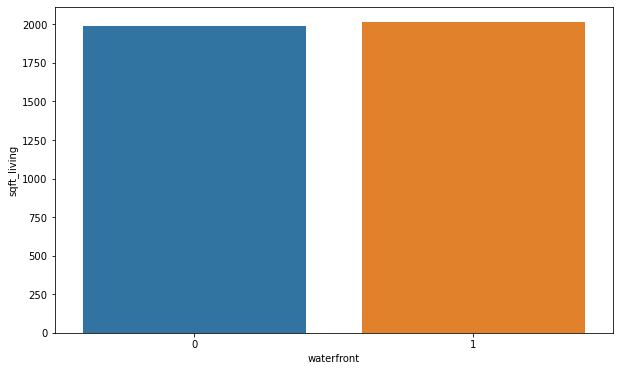

In [56]:
# average square foot of waterfront homes
waterfront_sqft = df[['sqft_living','waterfront']].groupby(by='waterfront')\
.mean().sort_values(by='sqft_living').reset_index()

fig, ax = plt.subplots(figsize=(10,6))

sns.barplot(data=waterfront_sqft, x='waterfront', y='sqft_living', ax=ax)
plt.ticklabel_format(style='plain', axis='y',useOffset=False)

<AxesSubplot:xlabel='view', ylabel='sqft_living'>

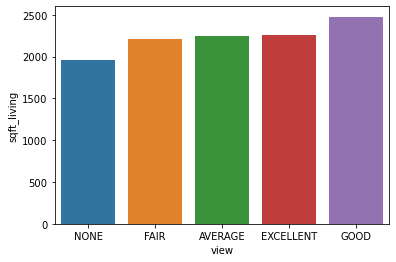

In [57]:
# Average square foot by view
view_sqft = df[['sqft_living', 'view']].groupby(by='view').mean().reset_index().\
sort_values(by='sqft_living')

sns.barplot(data=view_sqft, x='view', y='sqft_living')

<AxesSubplot:xlabel='grade', ylabel='sqft_living'>

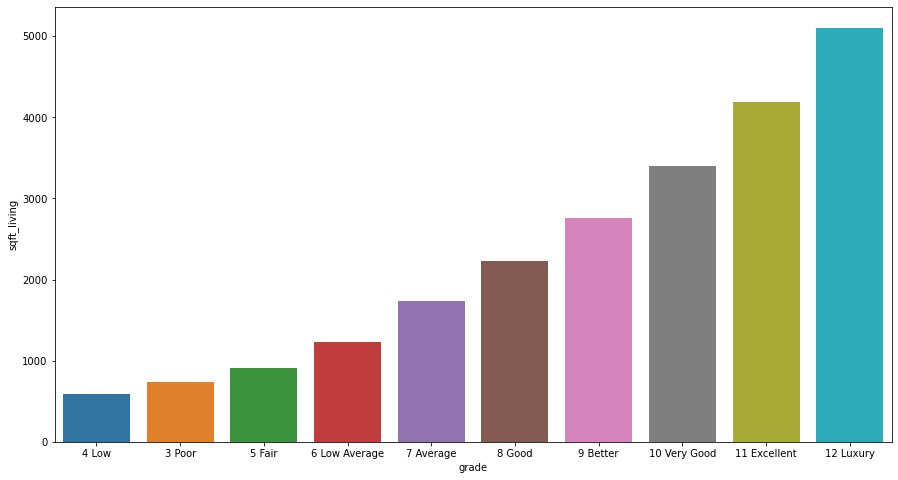

In [58]:
# Average square foot by grade
sqft_grade = df[['sqft_living', 'grade']].groupby(by='grade').mean().\
reset_index().sort_values(by='sqft_living')

fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(data=sqft_grade, x='grade', y='sqft_living', ax=ax)

<AxesSubplot:xlabel='grade', ylabel='sqft_living'>

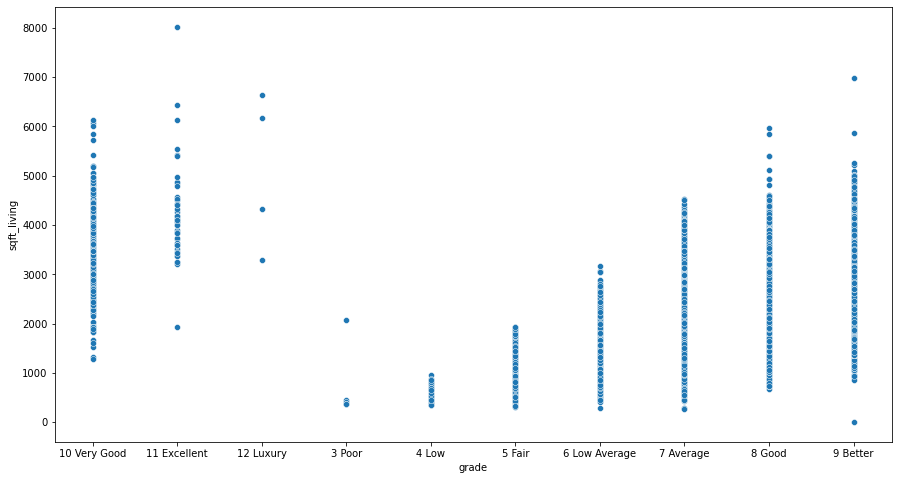

In [59]:
# Scatter plot average square foot and grade
sqft_grade = df[['sqft_living', 'grade']].sort_values(by='grade')

fig, ax = plt.subplots(figsize=(15,8))
sns.scatterplot(data=sqft_grade, x='grade', y='sqft_living', ax=ax)

In [60]:
df.describe().price

count     24735.00
mean     939824.37
std      366320.70
min      426000.00
25%      650000.00
50%      849000.00
75%     1175000.00
max     1930500.00
Name: price, dtype: float64

## Simple Linear Regression

In [61]:
# correlation table
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,...,sqft_patio,yr_built,yr_renovated,lat,long,logged_price,grade_num,condition_num,view_num,yr_renovated_yes_or_no
id,1.00,0.00,0.00,0.01,-0.00,-0.13,0.04,-0.03,0.01,-0.01,...,-0.04,0.03,-0.03,0.01,0.01,0.00,0.03,-0.02,-0.01,-0.01
price,0.00,1.00,0.28,0.39,0.52,0.08,0.18,0.03,0.43,0.20,...,0.22,0.04,0.06,0.43,0.13,0.98,0.49,0.03,0.18,0.02
bedrooms,0.00,0.28,1.00,0.55,0.63,-0.01,0.14,-0.06,0.51,0.20,...,0.13,0.14,-0.00,-0.09,0.14,0.29,0.31,0.03,-0.01,0.01
bathrooms,0.01,0.39,0.55,1.00,0.71,0.02,0.40,-0.02,0.59,0.18,...,0.25,0.46,0.02,-0.07,0.20,0.40,0.56,-0.06,0.06,0.02
sqft_living,-0.00,0.52,0.63,0.71,1.00,0.12,0.31,0.00,0.84,0.26,...,0.32,0.32,0.01,-0.10,0.27,0.52,0.63,-0.07,0.14,-0.01
sqft_lot,-0.13,0.08,-0.01,0.02,0.12,1.00,-0.04,0.10,0.13,-0.00,...,0.17,0.00,0.02,-0.11,0.20,0.08,0.04,0.01,0.11,0.00
floors,0.04,0.18,0.14,0.40,0.31,-0.04,1.00,-0.02,0.49,-0.31,...,0.09,0.54,-0.03,-0.01,0.08,0.19,0.47,-0.29,-0.03,-0.05
waterfront,-0.03,0.03,-0.06,-0.02,0.00,0.10,-0.02,1.00,-0.00,0.00,...,0.10,-0.05,0.08,-0.07,0.05,0.03,-0.04,0.01,0.35,0.00
sqft_above,0.01,0.43,0.51,0.59,0.84,0.13,0.49,-0.00,1.00,-0.22,...,0.24,0.44,-0.01,-0.18,0.39,0.43,0.62,-0.16,0.04,-0.03
sqft_basement,-0.01,0.20,0.20,0.18,0.26,-0.00,-0.31,0.00,-0.22,1.00,...,0.15,-0.28,0.03,0.18,-0.24,0.21,0.03,0.10,0.19,0.02


In [62]:
# correlated to price
df.corr().price.sort_values()

id                       0.00
yr_renovated_yes_or_no   0.02
condition_num            0.03
waterfront               0.03
yr_built                 0.04
yr_renovated             0.06
sqft_lot                 0.08
long                     0.13
view_num                 0.18
floors                   0.18
sqft_garage              0.19
sqft_basement            0.20
sqft_patio               0.22
bedrooms                 0.28
bathrooms                0.39
lat                      0.43
sqft_above               0.43
grade_num                0.49
sqft_living              0.52
logged_price             0.98
price                    1.00
Name: price, dtype: float64

Most correlated variables to price are sqft_living, grade_num, sqft_above, bathrooms, sqft_patio, and view_num.

For our simple linear regression we are going to use sqft_living to predict price

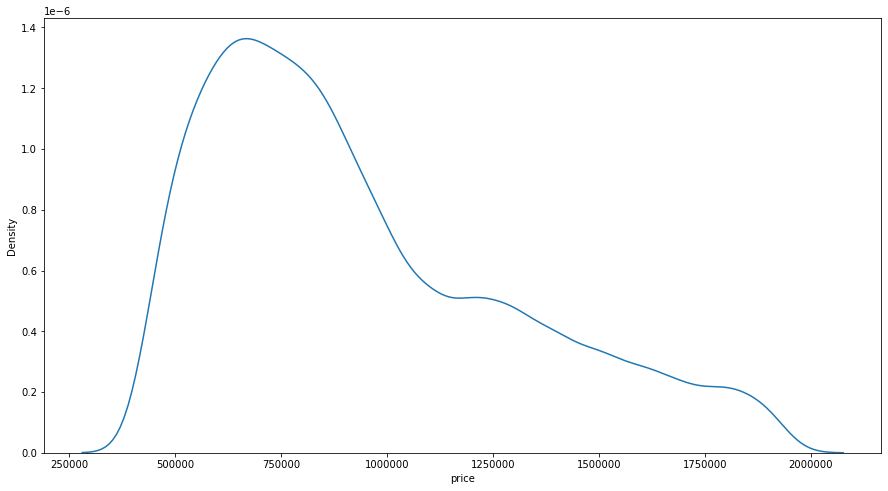

In [63]:
# distribution of price
fig, ax = plt.subplots(figsize=(15,8))

sns.kdeplot(data=df, x='price', ax=ax)
plt.ticklabel_format(style='plain', axis='x',useOffset=False)

### Model 1

In [64]:
# Setting up simple linear regression
X = df['sqft_living']
y = df['price']

# model
model = sm.OLS(endog=y, exog=sm.add_constant(X)).fit()
summary = model.summary()

In [65]:
# summary
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.268
Model:                            OLS   Adj. R-squared:                  0.268
Method:                 Least Squares   F-statistic:                     9069.
Date:                Thu, 04 Aug 2022   Prob (F-statistic):               0.00
Time:                        10:38:08   Log-Likelihood:            -3.4812e+05
No. Observations:               24735   AIC:                         6.962e+05
Df Residuals:                   24733   BIC:                         6.963e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        4.435e+05   5579.490     79.489      0.000    4.33e+05    4.54e+05
sqft_living   249.0579      2.615     95.232      0.000     243.932     254.184
==============================================================================
Omnibus:                     1516.613   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1813.791
Skew:                           0.662   Prob(JB):                         0.00
Kurtosis:                       3.065   Cond. No.                     5.97e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.97e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The distribution of price is skewed right so to try and improve our linear regression model we are going to transform the price values by using a logarithm and square root to normalize the distribution.

### Model 2

In [66]:
# Change y to the log of y to work around skewness
X = df['sqft_living']
y = np.log(df['price'])

# model
model = sm.OLS(endog=y, exog=sm.add_constant(X)).fit()
summary = model.summary()

<AxesSubplot:xlabel='price', ylabel='Density'>

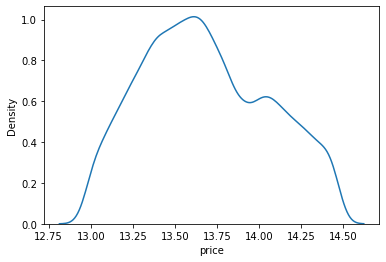

In [67]:
sns.kdeplot(data=y)

In [68]:
#summary
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.270
Model:                            OLS   Adj. R-squared:                  0.270
Method:                 Least Squares   F-statistic:                     9169.
Date:                Thu, 04 Aug 2022   Prob (F-statistic):               0.00
Time:                        10:38:08   Log-Likelihood:                -6935.4
No. Observations:               24735   AIC:                         1.387e+04
Df Residuals:                   24733   BIC:                         1.389e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          13.1718      0.006   2309.595      0.000      13.161      13.183
sqft_living     0.0003   2.67e-06     95.757      0.000       0.000       0.000
==============================================================================
Omnibus:                      918.320   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              519.724
Skew:                           0.198   Prob(JB):                    1.39e-113
Kurtosis:                       2.410   Cond. No.                     5.97e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.97e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Model 3 - Baseline for Simple Linear Regression

In [69]:
# Change y to the square root of y to work around skewness
X = df['sqft_living']
y = np.sqrt(df['price'])

# model
model = sm.OLS(endog=y, exog=sm.add_constant(X)).fit()
summary = model.summary()

summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.272
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     9218.
Date:                Thu, 04 Aug 2022   Prob (F-statistic):               0.00
Time:                        10:38:08   Log-Likelihood:            -1.5993e+05
No. Observations:               24735   AIC:                         3.199e+05
Df Residuals:                   24733   BIC:                         3.199e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         703.8114      2.769    254.142      0.000     698.383     709.240
sqft_living     0.1246      0.001     96.010      0.000       0.122       0.127
==============================================================================
Omnibus:                      890.252   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              894.374
Skew:                           0.433   Prob(JB):                    6.15e-195
Kurtosis:                       2.655   Cond. No.                     5.97e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.97e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<AxesSubplot:xlabel='price', ylabel='Density'>

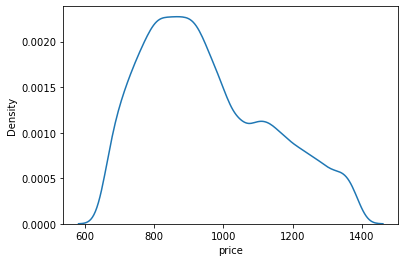

In [70]:
sns.kdeplot(data=y)

We achieved an R-squared of 0.439 in our square root of price model. This R-squared explains 43.9% of the variation of price. We are going to use this as our baseline model going forward.

## Multiple Linear Regression

In [71]:
# another look at our dataframe
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,yr_renovated,address,lat,long,logged_price,grade_num,condition_num,view_num,yr_renovated_yes_or_no,zipcode
0,7399300360,2022-05-24,675000.00,4,1.00,1180,7140,1.00,0,NO,...,0,"2102 Southeast 21st Court, Renton, Washington ...",47.46,-122.19,13.42,7,4,1,0,98055
1,8910500230,2021-12-13,920000.00,5,2.50,2770,6703,1.00,0,NO,...,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.71,-122.36,13.73,7,3,3,0,98133
3,1604601802,2021-12-14,775000.00,3,3.00,2160,1400,2.00,0,NO,...,0,"4079 Letitia Avenue South, Seattle, Washington...",47.57,-122.29,13.56,9,3,3,0,98118
4,8562780790,2021-08-24,592500.00,2,2.00,1120,758,2.00,0,NO,...,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.53,-122.07,13.29,7,3,1,0,98027
5,2807100156,2021-07-20,625000.00,2,1.00,1190,5688,1.00,0,NO,...,0,"1602 North 185th Street, Shoreline, Washington...",47.76,-122.34,13.35,7,3,1,0,98133


In [72]:
# correlation to price
df.corr().price.sort_values()

id                       0.00
yr_renovated_yes_or_no   0.02
condition_num            0.03
waterfront               0.03
yr_built                 0.04
yr_renovated             0.06
sqft_lot                 0.08
long                     0.13
view_num                 0.18
floors                   0.18
sqft_garage              0.19
sqft_basement            0.20
sqft_patio               0.22
bedrooms                 0.28
bathrooms                0.39
lat                      0.43
sqft_above               0.43
grade_num                0.49
sqft_living              0.52
logged_price             0.98
price                    1.00
Name: price, dtype: float64

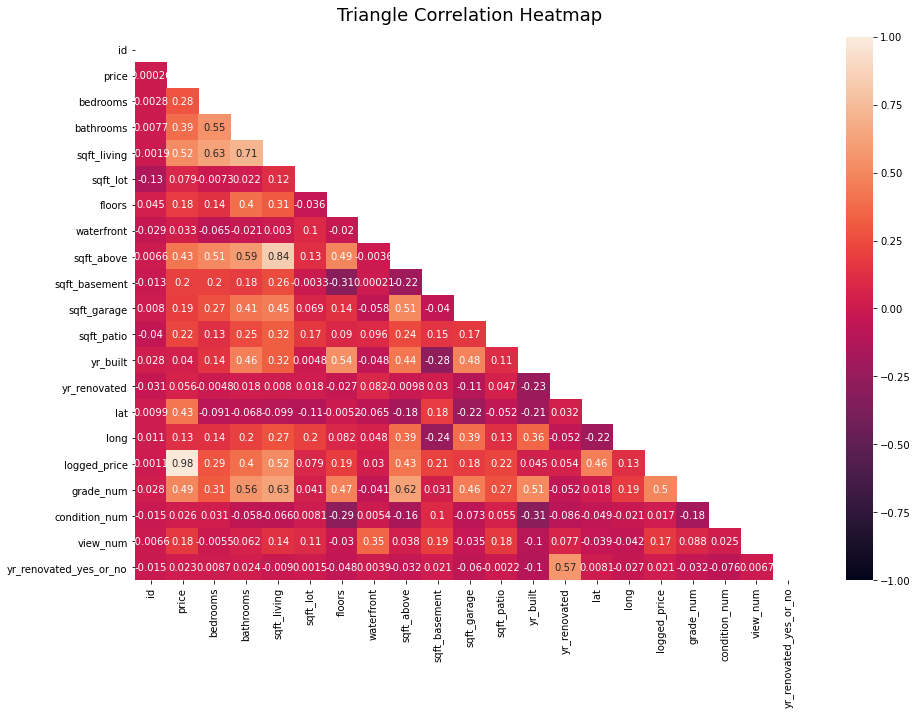

In [73]:
# correlation heat map
plt.figure(figsize=(15, 10))

# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

Looking for multicollinearity.

sqft_above and sqft_living are highly correlated. For our regression we are going to use sqft_above. Bathrooms and bedrooms are both correlated to sqft_living. To work around this multicollinearity we are going to use sqft_above in our regression and use this variable along with bedrooms and bathrooms because they are not as correlated with each other.

### Model 1

In [74]:
# setting X and y variables
relevant_columns = ['sqft_living', 'bedrooms', 'bathrooms']
X = df[relevant_columns]
y = np.sqrt(df['price'])

In [75]:
model = sm.OLS(y, sm.add_constant(X)).fit()
summary = model.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.276
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     3145.
Date:                Thu, 04 Aug 2022   Prob (F-statistic):               0.00
Time:                        10:38:13   Log-Likelihood:            -1.5985e+05
No. Observations:               24735   AIC:                         3.197e+05
Df Residuals:                   24731   BIC:                         3.197e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         720.7106      3.860    186.689      0.000     713.144     728.277
sqft_living     0.1264      0.002     62.487      0.000       0.122       0.130
bedrooms      -15.4955      1.381    -11.224      0.000     -18.202     -12.789
bathrooms      14.1986      1.845      7.694      0.000      10.581      17.816
==============================================================================
Omnibus:                      898.557   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              917.255
Skew:                           0.442   Prob(JB):                    6.62e-200
Kurtosis:                       2.672   Cond. No.                     8.62e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.62e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [76]:
model = LinearRegression()
model.fit(X,y)
model.score(X,y)

0.27616917768892413

This model did not achieve a much higher R-squared score. Now we are going to add some categorical variables starting with waterfront

### Model 2

In [77]:
# waterfront dummy variable
relevant_columns = ['sqft_living', 'bathrooms', 'waterfront']
X = df[relevant_columns]
y = np.sqrt(df['price'])

In [78]:
# model
model = sm.OLS(y, sm.add_constant(X)).fit()
summary = model.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.273
Method:                 Least Squares   F-statistic:                     3102.
Date:                Thu, 04 Aug 2022   Prob (F-statistic):               0.00
Time:                        10:38:14   Log-Likelihood:            -1.5990e+05
No. Observations:               24735   AIC:                         3.198e+05
Df Residuals:                   24731   BIC:                         3.198e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         694.4808      3.137    221.359      0.000     688.331     700.630
sqft_living     0.1168      0.002     63.222      0.000       0.113       0.120
bathrooms      10.8276      1.820      5.949      0.000       7.260      14.395
waterfront     52.4188      9.260      5.661      0.000      34.269      70.568
==============================================================================
Omnibus:                      897.791   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              899.126
Skew:                           0.433   Prob(JB):                    5.72e-196
Kurtosis:                       2.650   Cond. No.                     2.00e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  2e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Model 3

In [79]:
# modeling using zipcode as a dummy variable
X = df[['sqft_living', 'waterfront', 'zipcode']]
X = pd.get_dummies(X, columns=["zipcode"], drop_first=True)
y = np.sqrt(df["price"])

#This is just the chart of the graph after dummied, add more variables into X for more variables
model = sm.OLS(y, sm.add_constant(X)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     683.0
Date:                Thu, 04 Aug 2022   Prob (F-statistic):               0.00
Time:                        10:38:14   Log-Likelihood:            -1.4984e+05
No. Observations:               24735   AIC:                         2.998e+05
Df Residuals:                   24658   BIC:                         3.004e+05
Df Model:                          76                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           533.2961      4.889    109.079      0.000     523.713     542.879
sqft_living       0.1270      0.001    136.606      0.000       0.125       0.129
waterfront      108.6682      6.326     17.179      0.000      96.270     121.067
zipcode_98002   -18.1007      8.004     -2.262      0.024     -33.789      -2.413
zipcode_98003    -7.2889      6.963     -1.047      0.295     -20.938       6.360
zipcode_98004   475.4698     12.920     36.802      0.000     450.146     500.793
zipcode_98005   406.1572     12.152     33.423      0.000     382.339     429.976
zipcode_98006   331.3867      7.219     45.906      0.000     317.237     345.536
zipcode_98007   309.0766     10.156     30.432      0.000     289.170     328.983
zipcode_98008   335.6687      7.211     46.550      0.000     321.535     349.803
zipcode_98010    31.0763      7.512      4.137      0.000      16.352      45.800
zipcode_98011   240.1095      7.984     30.074      0.000     224.460     255.759
zipcode_98014   127.1951      9.802     12.977      0.000     107.983     146.407
zipcode_98019   143.4784      8.042     17.842      0.000     127.717     159.240
zipcode_98022    17.4332      6.810      2.560      0.010       4.084      30.782
zipcode_98023    -9.3296      6.109     -1.527      0.127     -21.304       2.645
zipcode_98024   223.1935     11.636     19.182      0.000     200.387     246.000
zipcode_98027   251.1176      7.315     34.327      0.000     236.779     265.456
zipcode_98028   208.0012      7.210     28.848      0.000     193.869     222.134
zipcode_98029   329.0760      7.690     42.793      0.000     314.003     344.149
zipcode_98030    17.3775      7.146      2.432      0.015       3.372      31.383
zipcode_98031    18.9735      6.494      2.922      0.003       6.244      31.703
zipcode_98032     8.8428      9.494      0.931      0.352      -9.766      27.452
zipcode_98033   381.2712      7.272     52.429      0.000     367.017     395.525
zipcode_98034   273.8244      6.102     44.878      0.000     261.865     285.784
zipcode_98038    73.2951      5.747     12.754      0.000      62.031      84.560
zipcode_98039   514.8440    103.667      4.966      0.000     311.651     718.037
zipcode_98040   401.7326     10.799     37.202      0.000     380.567     422.899
zipcode_98042    18.5692      5.653      3.285      0.001       7.489      29.649
zipcode_98045   160.3054      6.684     23.985      0.000     147.205     173.406
zipcode_98047   -20.8612     13.703     -1.522      0.128     -47.719       5.997
zipcode_98050   138.4194    103.667      1.335      0.182     -64.774     341.613
zipcode_98051   109.7469     14.431      7.605      0.000      81.461     138.033
zipcode_98052   346.8417      6.622     52.375      0.000     333.862     359.822
zipcode_98053   272.5500      7.537     36.159   

In [80]:
# this is to check for multicollinearity
vif = pd.DataFrame({'variables':X.columns[1:], 
                    'VIF':[variance_inflation_factor(X.values, i+1) for i in range(len(X.columns[1:]))]})
vif.sort_values(by="VIF")

,variables,VIF
29,zipcode_98050,1.00
24,zipcode_98039,1.00
74,zipcode_98288,1.01
28,zipcode_98047,1.01
3,zipcode_98004,1.02
...,...,...
13,zipcode_98023,1.19
36,zipcode_98058,1.20
44,zipcode_98092,1.22
23,zipcode_98038,1.28


### Model 4 - Standardized to See Condition Number Properly

In [81]:
# Using standardscaler to transform independent variables
ss = StandardScaler()
ss.fit(X)
X = ss.transform(X)

In [82]:
# model after standardizing X
y = np.sqrt(df['price'])

model = sm.OLS(y, sm.add_constant(X)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     683.0
Date:                Thu, 04 Aug 2022   Prob (F-statistic):               0.00
Time:                        10:39:14   Log-Likelihood:            -1.4984e+05
No. Observations:               24735   AIC:                         2.998e+05
Df Residuals:                   24658   BIC:                         3.004e+05
Df Model:                          76                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        952.1665      0.659   1445.900      0.000     950.876     953.457
x1            96.7537      0.708    136.606      0.000      95.365      98.142
x2            11.5972      0.675     17.179      0.000      10.274      12.920
x3            -1.7889      0.791     -2.262      0.024      -3.339      -0.238
x4            -0.8918      0.852     -1.047      0.295      -2.562       0.778
x5            25.7921      0.701     36.802      0.000      24.418      27.166
x6            23.6287      0.707     33.423      0.000      22.243      25.014
x7            38.2472      0.833     45.906      0.000      36.614      39.880
x8            22.2623      0.732     30.432      0.000      20.828      23.696
x9            38.7986      0.833     46.550      0.000      37.165      40.432
x10            3.3791      0.817      4.137      0.000       1.778       4.980
x11           23.7780      0.791     30.074      0.000      22.228      25.328
x12            9.5760      0.738     12.977      0.000       8.130      11.022
x13           14.0643      0.788     17.842      0.000      12.519      15.609
x14            2.2151      0.865      2.560      0.010       0.519       3.911
x15           -1.4550      0.953     -1.527      0.127      -3.323       0.412
x16           13.6599      0.712     19.182      0.000      12.264      15.056
x17           28.3771      0.827     34.327      0.000      26.757      29.997
x18           24.0420      0.833     28.848      0.000      22.409      25.676
x19           34.4427      0.805     42.793      0.000      32.865      36.020
x20            2.0379      0.838      2.432      0.015       0.395       3.680
x21            2.6253      0.899      2.922      0.003       0.864       4.387
x22            0.6933      0.744      0.931      0.352      -0.766       2.152
x23           43.4816      0.829     52.429      0.000      41.856      45.107
x24           42.8727      0.955     44.878      0.000      41.000      44.745
x25           13.1222      1.029     12.754      0.000      11.105      15.139
x26            3.2735      0.659      4.966      0.000       1.982       4.565
x27           26.8513      0.722     37.202      0.000      25.437      28.266
x28            3.4659      1.055      3.285      0.001       1.398       5.534
x29           21.0709      0.878     23.985      0.000      19.349      22.793
x30           -1.0598      0.696     -1.522      0.128      -2.424       0.305
x31            0.8801      0.659      1.335      0.182      -0.412       2.172
x32            5.2623      0.692      7.605      0.000       3.906       6.619
x33           46.3042      0.884     52.375      0.000      44.571      48.037
x34           29.3878      0.813     36.159      0.000      27.795      30.981
x35            4.2181      0.770      5.479      0.000       2.709       5.727
x3

After standardizing our independent variables we double check our Condition Number to see if there is multicollinearity. Our new Condition Number is 8 which shows that there is very little multicollinearity in our model.

### Model 5

In [83]:
# modeling using grade as a dummy variable
X = df[['sqft_living', 'waterfront', 'grade']]
X = pd.get_dummies(X, columns=["grade"], drop_first=True)
y = np.sqrt(df["price"])

#This is just the chart of the graph after dummied, add more variables into X for more variables
model = sm.OLS(y, sm.add_constant(X)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.327
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     1094.
Date:                Thu, 04 Aug 2022   Prob (F-statistic):               0.00
Time:                        10:39:14   Log-Likelihood:            -1.5894e+05
No. Observations:               24735   AIC:                         3.179e+05
Df Residuals:                   24723   BIC:                         3.180e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 925.4026      8.596    107.649      0.000     908.553     942.252
sqft_living             0.0812      0.002     50.447      0.000       0.078       0.084
waterfront             61.2272      8.962      6.832      0.000      43.662      78.792
grade_11 Excellent     -7.5399     21.993     -0.343      0.732     -50.648      35.568
grade_12 Luxury      -175.3753     75.087     -2.336      0.020    -322.551     -28.200
grade_3 Poor         -120.3536     67.340     -1.787      0.074    -252.344      11.637
grade_4 Low          -153.0606     29.931     -5.114      0.000    -211.727     -94.394
grade_5 Fair         -188.3745     12.031    -15.658      0.000    -211.956    -164.794
grade_6 Low Average  -219.8192      8.111    -27.100      0.000    -235.718    -203.920
grade_7 Average      -169.1714      7.293    -23.196      0.000    -183.466    -154.877
grade_8 Good         -107.9923      7.085    -15.243      0.000    -121.879     -94.106
grade_9 Better        -34.9718      7.314     -4.782      0.000     -49.308     -20.636
==============================================================================
Omnibus:                      831.880   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              890.844
Skew:                           0.451   Prob(JB):                    3.59e-194
Kurtosis:                       2.775   Cond. No.                     1.69e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.69e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Model 6

In [84]:
# modeling using zipcode waterfront, and grade as dummy variables
X = df[['sqft_living', 'waterfront', 'zipcode', 'grade']]
X = pd.get_dummies(X, columns=["zipcode",'grade'], drop_first=True)
y = np.sqrt(df["price"])

model = sm.OLS(y, sm.add_constant(X)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     655.3
Date:                Thu, 04 Aug 2022   Prob (F-statistic):               0.00
Time:                        10:39:15   Log-Likelihood:            -1.4923e+05
No. Observations:               24735   AIC:                         2.986e+05
Df Residuals:                   24649   BIC:                         2.993e+05
Df Model:                          85                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 650.4239      7.524     86.446      0.000     635.676     665.172
sqft_living             0.1055      0.001     92.038      0.000       0.103       0.108
waterfront            109.1007      6.207     17.576      0.000      96.934     121.268
zipcode_98002          -9.5022      7.823     -1.215      0.225     -24.836       5.831
zipcode_98003          -8.8801      6.802     -1.306      0.192     -22.212       4.452
zipcode_98004         469.6929     12.620     37.218      0.000     444.957     494.429
zipcode_98005         393.1002     11.871     33.116      0.000     369.833     416.367
zipcode_98006         317.6690      7.066     44.958      0.000     303.820     331.519
zipcode_98007         308.1891      9.918     31.073      0.000     288.749     327.630
zipcode_98008         331.5627      7.043     47.079      0.000     317.759     345.367
zipcode_98010          26.2048      7.346      3.567      0.000      11.805      40.604
zipcode_98011         233.6540      7.798     29.965      0.000     218.370     248.938
zipcode_98014         124.4098      9.570     13.000      0.000     105.652     143.167
zipcode_98019         133.1255      7.858     16.942      0.000     117.724     148.527
zipcode_98022          18.0155      6.651      2.709      0.007       4.979      31.052
zipcode_98023         -16.4185      5.975     -2.748      0.006     -28.130      -4.707
zipcode_98024         217.5318     11.367     19.138      0.000     195.252     239.811
zipcode_98027         240.7212      7.161     33.616      0.000     226.685     254.757
zipcode_98028         204.1963      7.041     28.999      0.000     190.395     217.998
zipcode_98029         302.1212      7.551     40.010      0.000     287.320     316.922
zipcode_98030          16.8177      6.976      2.411      0.016       3.143      30.492
zipcode_98031          18.2388      6.343      2.875      0.004       5.806      30.672
zipcode_98032           6.9084      9.274      0.745      0.456     -11.270      25.086
zipcode_98033         374.4712      7.104     52.716      0.000     360.548     388.395
zipcode_98034         275.1953      5.965     46.137      0.000     263.504     286.887
zipcode_98038          70.7008      5.612     12.597      0.000      59.700      81.702
zipcode_98039         519.6851    101.200      5.135      0.000     321.328     718.043
zipcode_98040         387.4844     10.554     36.714      0.000     366.798     408.171
zipcode_98042          15.8606      5.521      2.873      0.004       5.038      26.683
zipcode_98045         149.9880      6.533     22.958      0.000     137.183     162.793
zipcode_98047         -12.4562     13.382     -0.931      0.352     -38.686      13.774
zipcode_98050         161.5723    101.218      1.596      0.110     -36.821     359.966
zip

In [85]:
y_pred = model.predict(sm.add_constant(X))


print(mean_absolute_error(y, y_pred))
print(mean_squared_error(y, y_pred, squared=False))


75.69457527071678
100.92621161954845


### Model 7

In [86]:
# modeling using zipcode as a dummy variable
X = df[['sqft_living', 'waterfront', 'zipcode', 'yr_renovated_yes_or_no']]
X = pd.get_dummies(X, columns=["zipcode"], drop_first=True)
y = np.sqrt(df["price"])

#This is just the chart of the graph after dummied, add more variables into X for more variables
model = sm.OLS(y, sm.add_constant(X)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     676.2
Date:                Thu, 04 Aug 2022   Prob (F-statistic):               0.00
Time:                        10:39:16   Log-Likelihood:            -1.4981e+05
No. Observations:               24735   AIC:                         2.998e+05
Df Residuals:                   24657   BIC:                         3.004e+05
Df Model:                          77                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    533.1383      4.884    109.159      0.000     523.565     542.711
sqft_living                0.1270      0.001    136.711      0.000       0.125       0.129
waterfront               108.4857      6.319     17.168      0.000      96.100     120.871
yr_renovated_yes_or_no    41.4500      5.731      7.232      0.000      30.216      52.684
zipcode_98002            -18.9037      7.996     -2.364      0.018     -34.577      -3.231
zipcode_98003             -7.5056      6.956     -1.079      0.281     -21.140       6.129
zipcode_98004            474.5566     12.907     36.768      0.000     449.258     499.855
zipcode_98005            406.3865     12.139     33.477      0.000     382.593     430.180
zipcode_98006            330.7504      7.212     45.862      0.000     316.615     344.886
zipcode_98007            308.0117     10.147     30.356      0.000     288.124     327.900
zipcode_98008            335.1486      7.204     46.524      0.000     321.029     349.268
zipcode_98010             31.1890      7.504      4.156      0.000      16.480      45.898
zipcode_98011            239.6661      7.976     30.048      0.000     224.033     255.300
zipcode_98014            126.8468      9.792     12.955      0.000     107.655     146.039
zipcode_98019            143.7128      8.033     17.890      0.000     127.967     159.459
zipcode_98022             17.0449      6.804      2.505      0.012       3.710      30.380
zipcode_98023             -9.5024      6.103     -1.557      0.119     -21.465       2.460
zipcode_98024            223.4374     11.624     19.223      0.000     200.654     246.220
zipcode_98027            250.9645      7.308     34.342      0.000     236.641     265.288
zipcode_98028            207.8614      7.203     28.859      0.000     193.744     221.979
zipcode_98029            329.3077      7.682     42.867      0.000     314.250     344.365
zipcode_98030             17.2415      7.138      2.415      0.016       3.250      31.233
zipcode_98031             18.9397      6.488      2.919      0.004       6.224      31.656
zipcode_98032              8.7969      9.484      0.928      0.354      -9.793      27.387
zipcode_98033            380.4760      7.265     52.369      0.000     366.235     394.717
zipcode_98034            273.7128      6.095     44.906      0.000     261.766     285.660
zipcode_98038             73.2773      5.741     12.764      0.000      62.025      84.530
zipcode_98039            515.0516    103.559      4.973      0.000     312.069     718.034
zipcode_98040            401.9705     10.787     37.263      0.000     380.826     423.115
zipcode_98042             18.3821      5.647      3.255      0.001       7.313      29.451
zipcode_98045            160.0716      6.677     23.975      0.000     146.985  

### Model 8

In [87]:
# modeling using zipcode as a dummy variable
X = df[['sqft_living', 'yr_renovated_yes_or_no']]
y = np.sqrt(df["price"])

#This is just the chart of the graph after dummied, add more variables into X for more variables
model = sm.OLS(y, sm.add_constant(X)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.272
Model:                            OLS   Adj. R-squared:                  0.272
Method:                 Least Squares   F-statistic:                     4626.
Date:                Thu, 04 Aug 2022   Prob (F-statistic):               0.00
Time:                        10:39:16   Log-Likelihood:            -1.5992e+05
No. Observations:               24735   AIC:                         3.198e+05
Df Residuals:                   24732   BIC:                         3.199e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    703.1150      2.771    253.697      0.000     697.683     708.547
sqft_living                0.1247      0.001     96.098      0.000       0.122       0.127
yr_renovated_yes_or_no    43.1683      8.590      5.025      0.000      26.331      60.005
==============================================================================
Omnibus:                      891.674   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              895.355
Skew:                           0.433   Prob(JB):                    3.77e-195
Kurtosis:                       2.654   Cond. No.                     1.85e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.85e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Taking a look at outliers in prices

<AxesSubplot:xlabel='price', ylabel='Density'>

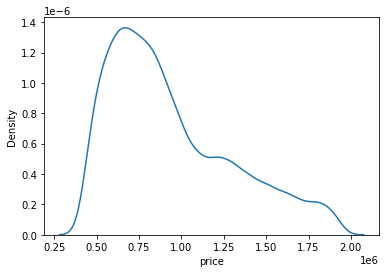

In [88]:
# price distribution
sns.kdeplot(data=df['price'])

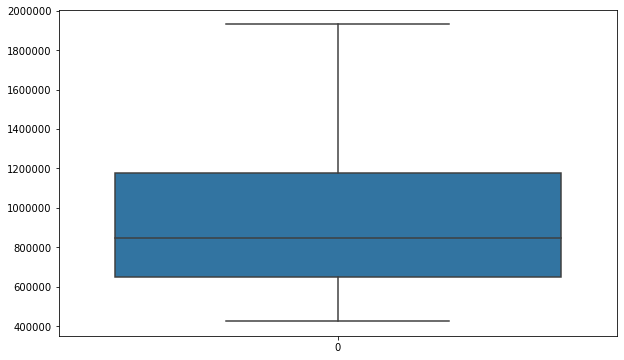

In [89]:
fig, ax = plt.subplots(figsize=(10,6))

sns.boxplot(data=df['price'], ax=ax)
plt.ticklabel_format(style='plain', axis='y',useOffset=False)

In [90]:
print(df['price'].mean())
print(df['price'].median())

939824.3685465939
849000.0


Running our model on our dataframe filtered to prices less than 5,000,000

### Model 9

In [91]:
# setting X and y values
df1 = df[(df.price) < 5000000]

# modeling using zipcode waterfront, and grade as dummy variables
X = df1[['sqft_living', 'waterfront', 'zipcode', 'grade']]
X = pd.get_dummies(X, columns=["zipcode",'grade'], drop_first=True)
y = np.sqrt(df1["price"])

model = sm.OLS(y, sm.add_constant(X)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     655.3
Date:                Thu, 04 Aug 2022   Prob (F-statistic):               0.00
Time:                        10:39:17   Log-Likelihood:            -1.4923e+05
No. Observations:               24735   AIC:                         2.986e+05
Df Residuals:                   24649   BIC:                         2.993e+05
Df Model:                          85                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 650.4239      7.524     86.446      0.000     635.676     665.172
sqft_living             0.1055      0.001     92.038      0.000       0.103       0.108
waterfront            109.1007      6.207     17.576      0.000      96.934     121.268
zipcode_98002          -9.5022      7.823     -1.215      0.225     -24.836       5.831
zipcode_98003          -8.8801      6.802     -1.306      0.192     -22.212       4.452
zipcode_98004         469.6929     12.620     37.218      0.000     444.957     494.429
zipcode_98005         393.1002     11.871     33.116      0.000     369.833     416.367
zipcode_98006         317.6690      7.066     44.958      0.000     303.820     331.519
zipcode_98007         308.1891      9.918     31.073      0.000     288.749     327.630
zipcode_98008         331.5627      7.043     47.079      0.000     317.759     345.367
zipcode_98010          26.2048      7.346      3.567      0.000      11.805      40.604
zipcode_98011         233.6540      7.798     29.965      0.000     218.370     248.938
zipcode_98014         124.4098      9.570     13.000      0.000     105.652     143.167
zipcode_98019         133.1255      7.858     16.942      0.000     117.724     148.527
zipcode_98022          18.0155      6.651      2.709      0.007       4.979      31.052
zipcode_98023         -16.4185      5.975     -2.748      0.006     -28.130      -4.707
zipcode_98024         217.5318     11.367     19.138      0.000     195.252     239.811
zipcode_98027         240.7212      7.161     33.616      0.000     226.685     254.757
zipcode_98028         204.1963      7.041     28.999      0.000     190.395     217.998
zipcode_98029         302.1212      7.551     40.010      0.000     287.320     316.922
zipcode_98030          16.8177      6.976      2.411      0.016       3.143      30.492
zipcode_98031          18.2388      6.343      2.875      0.004       5.806      30.672
zipcode_98032           6.9084      9.274      0.745      0.456     -11.270      25.086
zipcode_98033         374.4712      7.104     52.716      0.000     360.548     388.395
zipcode_98034         275.1953      5.965     46.137      0.000     263.504     286.887
zipcode_98038          70.7008      5.612     12.597      0.000      59.700      81.702
zipcode_98039         519.6851    101.200      5.135      0.000     321.328     718.043
zipcode_98040         387.4844     10.554     36.714      0.000     366.798     408.171
zipcode_98042          15.8606      5.521      2.873      0.004       5.038      26.683
zipcode_98045         149.9880      6.533     22.958      0.000     137.183     162.793
zipcode_98047         -12.4562     13.382     -0.931      0.352     -38.686      13.774
zipcode_98050         161.5723    101.218      1.596      0.110     -36.821     359.966
zip

### Model 10

In [92]:
# adding year_built and renovated to model
# setting X and y values
# modeling using zipcode waterfront, and grade as dummy variables
X = df[['sqft_living', 'waterfront', 'zipcode', 'grade', 'yr_renovated_yes_or_no']]
X = pd.get_dummies(X, columns=["zipcode",'grade'], drop_first=True)
y = np.sqrt(df["price"])

model = sm.OLS(y, sm.add_constant(X)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     650.4
Date:                Thu, 04 Aug 2022   Prob (F-statistic):               0.00
Time:                        10:39:18   Log-Likelihood:            -1.4920e+05
No. Observations:               24735   AIC:                         2.986e+05
Df Residuals:                   24648   BIC:                         2.993e+05
Df Model:                          86                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    651.2856      7.514     86.679      0.000     636.558     666.013
sqft_living                0.1053      0.001     91.960      0.000       0.103       0.108
waterfront               108.9117      6.198     17.571      0.000      96.762     121.061
yr_renovated_yes_or_no    47.7956      5.596      8.541      0.000      36.827      58.764
zipcode_98002            -10.3602      7.812     -1.326      0.185     -25.673       4.952
zipcode_98003             -9.1325      6.792     -1.345      0.179     -22.445       4.180
zipcode_98004            468.5894     12.602     37.183      0.000     443.888     493.291
zipcode_98005            393.2566     11.853     33.177      0.000     370.023     416.490
zipcode_98006            316.8093      7.056     44.897      0.000     302.979     330.640
zipcode_98007            306.9640      9.905     30.991      0.000     287.550     326.378
zipcode_98008            330.9274      7.033     47.054      0.000     317.143     344.712
zipcode_98010             26.2853      7.336      3.583      0.000      11.907      40.664
zipcode_98011            233.0931      7.787     29.935      0.000     217.831     248.355
zipcode_98014            123.9806      9.556     12.974      0.000     105.250     142.711
zipcode_98019            133.3070      7.846     16.990      0.000     117.928     148.686
zipcode_98022             17.5589      6.642      2.644      0.008       4.541      30.577
zipcode_98023            -16.6871      5.966     -2.797      0.005     -28.382      -4.992
zipcode_98024            217.7685     11.350     19.186      0.000     195.521     240.016
zipcode_98027            240.4324      7.151     33.624      0.000     226.417     254.448
zipcode_98028            204.0072      7.031     29.014      0.000     190.226     217.789
zipcode_98029            302.1531      7.540     40.072      0.000     287.374     316.932
zipcode_98030             16.6520      6.966      2.390      0.017       2.998      30.306
zipcode_98031             18.2045      6.334      2.874      0.004       5.789      30.620
zipcode_98032              6.8692      9.261      0.742      0.458     -11.282      25.021
zipcode_98033            373.4988      7.094     52.649      0.000     359.594     387.404
zipcode_98034            275.0937      5.956     46.187      0.000     263.419     286.768
zipcode_98038             70.6523      5.604     12.607      0.000      59.668      81.637
zipcode_98039            519.9976    101.052      5.146      0.000     321.929     718.066
zipcode_98040            387.6337     10.539     36.782      0.000     366.977     408.290
zipcode_98042             15.6197      5.514      2.833      0.005       4.813      26.427
zipcode_98045            149.6289      6.524     22.936      0.000     136.842  

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24735 entries, 0 to 30154
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      24735 non-null  int64         
 1   date                    24735 non-null  datetime64[ns]
 2   price                   24735 non-null  float64       
 3   bedrooms                24735 non-null  int64         
 4   bathrooms               24735 non-null  float64       
 5   sqft_living             24735 non-null  int64         
 6   sqft_lot                24735 non-null  int64         
 7   floors                  24735 non-null  float64       
 8   waterfront              24735 non-null  int64         
 9   greenbelt               24735 non-null  object        
 10  nuisance                24735 non-null  object        
 11  view                    24735 non-null  object        
 12  condition               24735 non-null  object

### Model 11

In [94]:
# adding year_built and renovated to model
# setting X and y values
# modeling using zipcode waterfront, and grade as dummy variables
X = df[['sqft_living', 'waterfront', 'zipcode', 'grade', 'yr_renovated_yes_or_no',
       'yr_built', 'sqft_patio', 'sqft_basement', 'condition','view',
       'bathrooms', 'floors']]
X = pd.get_dummies(X, columns=["zipcode",'grade', 'condition', 'view'], drop_first=True)
y = np.sqrt(df["price"])

model = sm.OLS(y, sm.add_constant(X)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     633.9
Date:                Thu, 04 Aug 2022   Prob (F-statistic):               0.00
Time:                        10:39:19   Log-Likelihood:            -1.4819e+05
No. Observations:               24735   AIC:                         2.966e+05
Df Residuals:                   24635   BIC:                         2.974e+05
Df Model:                          99                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   1658.2125     65.675     25.249      0.000    1529.486    1786.939
sqft_living                0.1010      0.001     68.121      0.000       0.098       0.104
waterfront                46.0354      6.596      6.979      0.000      33.107      58.964
yr_renovated_yes_or_no    43.9111      5.494      7.993      0.000      33.143      54.680
yr_built                  -0.4818      0.033    -14.606      0.000      -0.546      -0.417
sqft_patio                 0.0186      0.003      6.120      0.000       0.013       0.025
sqft_basement             -0.0239      0.002    -15.285      0.000      -0.027      -0.021
bathrooms                  9.7857      1.291      7.577      0.000       7.254      12.317
floors                   -15.1018      1.739     -8.683      0.000     -18.511     -11.693
zipcode_98002            -17.8884      7.515     -2.380      0.017     -32.619      -3.158
zipcode_98003            -20.2366      6.541     -3.094      0.002     -33.056      -7.417
zipcode_98004            465.4804     12.135     38.359      0.000     441.696     489.265
zipcode_98005            369.5309     11.425     32.344      0.000     347.137     391.924
zipcode_98006            300.1441      6.830     43.946      0.000     286.757     313.531
zipcode_98007            296.4390      9.534     31.093      0.000     277.752     315.126
zipcode_98008            309.9251      6.801     45.568      0.000     296.594     323.256
zipcode_98010             35.5112      7.067      5.025      0.000      21.659      49.363
zipcode_98011            233.8278      7.487     31.230      0.000     219.152     248.503
zipcode_98014            125.4633      9.182     13.664      0.000     107.466     143.461
zipcode_98019            140.9979      7.539     18.704      0.000     126.222     155.774
zipcode_98022             -4.2839      6.416     -0.668      0.504     -16.859       8.292
zipcode_98023            -24.6245      5.748     -4.284      0.000     -35.890     -13.359
zipcode_98024            204.3033     10.924     18.702      0.000     182.891     225.716
zipcode_98027            230.4386      6.892     33.438      0.000     216.931     243.946
zipcode_98028            205.2990      6.766     30.342      0.000     192.037     218.561
zipcode_98029            306.9447      7.257     42.295      0.000     292.720     321.169
zipcode_98030             12.5725      6.697      1.877      0.060      -0.555      25.700
zipcode_98031             16.3119      6.088      2.679      0.007       4.379      28.245
zipcode_98032             -0.0291      8.911     -0.003      0.997     -17.496      17.438
zipcode_98033            365.6745      6.829     53.547      0.000     352.289     379.060
zipcode_98034            270.7485      5.735     47.208      0.000     259.507  

### Model 12 - Final Model Before Train-Test Split

In [95]:
# modeling using zipcode waterfront, and grade as dummy variables
X = df[['sqft_living', 'waterfront', 'zipcode', 'grade', 'view']]
X = pd.get_dummies(X, columns=["zipcode",'grade', 'view'], drop_first=True)
y = np.sqrt(df["price"])

model = sm.OLS(y, sm.add_constant(X)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     650.0
Date:                Thu, 04 Aug 2022   Prob (F-statistic):               0.00
Time:                        10:39:20   Log-Likelihood:            -1.4891e+05
No. Observations:               24735   AIC:                         2.980e+05
Df Residuals:                   24645   BIC:                         2.987e+05
Df Model:                          89                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 693.3810      7.941     87.320      0.000     677.817     708.945
sqft_living             0.1021      0.001     89.610      0.000       0.100       0.104
waterfront             48.4791      6.767      7.164      0.000      35.215      61.744
zipcode_98002          -8.0894      7.721     -1.048      0.295     -23.223       7.044
zipcode_98003         -12.2227      6.718     -1.819      0.069     -25.390       0.945
zipcode_98004         471.3241     12.455     37.841      0.000     446.911     495.738
zipcode_98005         389.0278     11.716     33.204      0.000     366.063     411.992
zipcode_98006         317.1151      6.974     45.473      0.000     303.446     330.784
zipcode_98007         310.0490      9.789     31.674      0.000     290.863     329.235
zipcode_98008         327.8348      6.953     47.152      0.000     314.207     341.463
zipcode_98010          28.0278      7.254      3.864      0.000      13.810      42.246
zipcode_98011         235.0108      7.696     30.538      0.000     219.927     250.095
zipcode_98014         124.2460      9.446     13.153      0.000     105.731     142.761
zipcode_98019         133.6993      7.755     17.240      0.000     118.498     148.900
zipcode_98022           3.9895      6.597      0.605      0.545      -8.942      16.921
zipcode_98023         -16.8893      5.899     -2.863      0.004     -28.452      -5.327
zipcode_98024         217.5839     11.222     19.390      0.000     195.589     239.579
zipcode_98027         240.8083      7.068     34.072      0.000     226.955     254.661
zipcode_98028         202.9658      6.950     29.203      0.000     189.343     216.589
zipcode_98029         303.7847      7.453     40.761      0.000     289.177     318.393
zipcode_98030          17.1686      6.885      2.494      0.013       3.673      30.664
zipcode_98031          19.3529      6.260      3.091      0.002       7.082      31.623
zipcode_98032           6.3793      9.153      0.697      0.486     -11.561      24.320
zipcode_98033         373.5800      7.012     53.278      0.000     359.836     387.324
zipcode_98034         274.1438      5.887     46.565      0.000     262.604     285.683
zipcode_98038          72.2216      5.540     13.038      0.000      61.364      83.079
zipcode_98039         519.6722     99.872      5.203      0.000     323.916     715.428
zipcode_98040         382.2331     10.419     36.685      0.000     361.811     402.656
zipcode_98042          17.5012      5.450      3.212      0.001       6.820      28.183
zipcode_98045         148.6985      6.451     23.050      0.000     136.054     161.343
zipcode_98047         -12.0401     13.207     -0.912      0.362     -37.926      13.846
zipcode_98050         161.2125     99.891      1.614      0.107     -34.579     357.004
zip

In [96]:
model.params.index

Index(['const', 'sqft_living', 'waterfront', 'zipcode_98002', 'zipcode_98003',
       'zipcode_98004', 'zipcode_98005', 'zipcode_98006', 'zipcode_98007',
       'zipcode_98008', 'zipcode_98010', 'zipcode_98011', 'zipcode_98014',
       'zipcode_98019', 'zipcode_98022', 'zipcode_98023', 'zipcode_98024',
       'zipcode_98027', 'zipcode_98028', 'zipcode_98029', 'zipcode_98030',
       'zipcode_98031', 'zipcode_98032', 'zipcode_98033', 'zipcode_98034',
       'zipcode_98038', 'zipcode_98039', 'zipcode_98040', 'zipcode_98042',
       'zipcode_98045', 'zipcode_98047', 'zipcode_98050', 'zipcode_98051',
       'zipcode_98052', 'zipcode_98053', 'zipcode_98055', 'zipcode_98056',
       'zipcode_98057', 'zipcode_98058', 'zipcode_98059', 'zipcode_98065',
       'zipcode_98070', 'zipcode_98072', 'zipcode_98074', 'zipcode_98075',
       'zipcode_98077', 'zipcode_98092', 'zipcode_98102', 'zipcode_98103',
       'zipcode_98105', 'zipcode_98106', 'zipcode_98107', 'zipcode_98108',
       'zipcode_98109

In [97]:
# Performance Metrics
y_pred = model.predict(sm.add_constant(X))

print(mean_absolute_error(y, y_pred) ** 2)
print(mean_squared_error(y, y_pred, squared=True))

5570.404872466698
9919.043744154214


## Train-Test Split

We are going to use our Model 12 to do Train-Test Split on the data

In [98]:
# defining X and y
X = df[['sqft_living', 'waterfront', 'zipcode', 'grade', 'view']]
X = pd.get_dummies(X, columns=["zipcode",'grade', 'view'], drop_first=True)
y = np.sqrt(df["price"])

In [99]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [100]:
# set up Linear Regression
lr = LinearRegression()

In [101]:
# fit model
lr.fit(X_train, y_train)

LinearRegression()

In [102]:
# metrics
y_pred = lr.predict(X_train)

print(lr.score(X_train, y_train))
print(mean_absolute_error(y_train, y_pred) ** 2)
print(mean_squared_error(y_train, y_pred, squared=True))

0.6995629856537726
5597.135224319452
9986.627384162137


Our training model MAE is about 10,307 dollars which means are margin of error for predicting a house is 10,307 dollars in either direction. Our RMSE is 26,239 dollars.

Now to predict on our X_test and evaluate based on y_test

In [103]:
# metrics
y_pred = lr.predict(X_test)

print(mean_absolute_error(y_test, y_pred) ** 2)
print(mean_squared_error(y_test, y_pred, squared=True))

5535.00621133392
9816.994162198467


Our test showed a slight increase in MAE and a decrease in our RMSE.

### Grouping Zipcodes

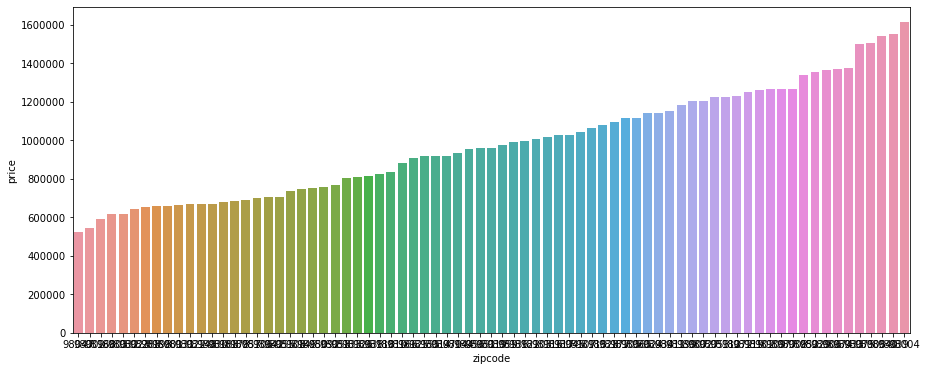

In [104]:
# top 10 zipcodes by average price
zipcode_price = df[['price','zipcode']].groupby(by='zipcode').mean().reset_index().sort_values(by='price')\


fig, ax = plt.subplots(figsize=(15,6))

sns.barplot(data=zipcode_price, x='zipcode', y='price', ax=ax)
plt.ticklabel_format(style='plain', axis='y',useOffset=False)

In [105]:
print(list(df.sqft_living.values))

[1180, 2770, 2160, 1120, 1190, 2080, 2214, 2340, 2980, 2570, 2130, 3170, 2408, 1980, 2420, 1670, 1000, 1100, 1640, 1590, 900, 3400, 1820, 2020, 3280, 2390, 1140, 1570, 1530, 1040, 1350, 3540, 2640, 5200, 1830, 1790, 2150, 3870, 1920, 1220, 3030, 3450, 1320, 1360, 2650, 1940, 1240, 1980, 1920, 1430, 1330, 2170, 1880, 1630, 1890, 1220, 1210, 1980, 1690, 3890, 1150, 3470, 3080, 1670, 3360, 1720, 3210, 1660, 1130, 1520, 2520, 2030, 2390, 1490, 1715, 980, 650, 2190, 1650, 1510, 1740, 1630, 2160, 2640, 940, 3220, 3040, 2070, 1350, 770, 1260, 1010, 3171, 2150, 1020, 2170, 2110, 2110, 1350, 480, 1960, 1250, 2470, 1360, 1890, 3340, 1440, 1400, 1270, 1120, 1560, 2855, 1330, 2430, 2640, 580, 2290, 2632, 1850, 1590, 2350, 1290, 3320, 1450, 1810, 1670, 2570, 2760, 2350, 1170, 3250, 1940, 3090, 1130, 1420, 3250, 1100, 1730, 1460, 2470, 1830, 1590, 830, 2910, 3470, 2420, 1140, 2060, 2370, 1680, 2990, 2180, 2520, 1500, 1820, 1700, 1860, 1740, 2640, 1400, 2530, 3150, 1640, 1910, 3420, 1440, 2220, 1400,